In [49]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('challenge.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
df.sort_values(by=['created_at'],ascending=True)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1862,1863,39,738,536,4,cash,2017-03-01 0:08:09
1741,1742,39,910,268,2,cash,2017-03-01 0:10:19
3228,3229,97,912,324,2,cash,2017-03-01 0:14:12
1267,1268,80,798,290,2,credit_card,2017-03-01 0:19:31
2689,2690,49,799,258,2,credit_card,2017-03-01 0:22:25
...,...,...,...,...,...,...,...
2765,2766,9,708,236,2,debit,2017-03-30 9:22:41
4890,4891,63,853,136,1,cash,2017-03-30 9:27:00
244,245,32,928,202,2,cash,2017-03-30 9:30:28
211,212,22,712,292,2,credit_card,2017-03-30 9:40:40


In [3]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [7]:
df.duplicated().sum()

0

In [69]:
df['order_amount'].median()

284.0

1. There are 5,000 orders.
2. There are 100 shops. 
3. Data is over a 30-day window. 
4. No duplicated value found. 

The histogram shows some outliers. It will be the reason of wrong calculation for the AOV. The relatively high amount of order increases the average amount per order. Even if a pair of sneakers relatively affordable, the amount of AOV is high due to the outliers. 

In [102]:
df['cost_per_item']=df['order_amount']/df['total_items']

<AxesSubplot:>

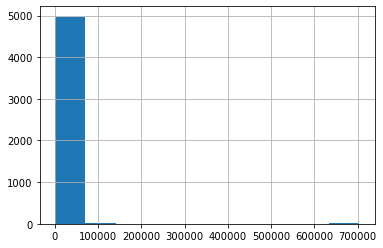

In [103]:
df['order_amount'].hist()

<AxesSubplot:>

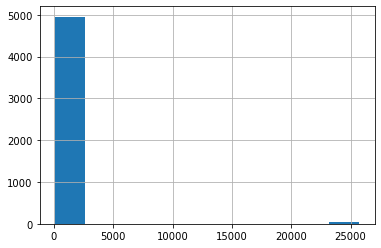

In [104]:
df['cost_per_item'].hist()

There is some outliers in the dataset: Large in total amount of order and high cost for a pair of sneakers

In [40]:
df.groupby(['order_amount']).size().reset_index(name='count').sort_values(['order_amount'], ascending=False).head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


In [41]:
#Investigating where are the outliers from
df.loc[df['order_amount'].isin([704000, 51450, 25725])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,cost_per_item
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0


In [96]:
shop78 = df[df['shop_id']==78]
shop78.describe()

,order_id,shop_id,user_id,order_amount,total_items,cost_per_item
count,46.000000,46.0,46.000000,46.000000,46.000000,46.0
mean,2663.021739,78.0,867.739130,49213.043478,1.913043,25725.0
std,1338.520020,0.0,81.314871,26472.227449,1.029047,0.0
min,161.000000,78.0,707.000000,25725.000000,1.000000,25725.0
25%,1428.250000,78.0,812.500000,25725.000000,1.000000,25725.0
50%,2796.500000,78.0,866.500000,51450.000000,2.000000,25725.0
75%,3720.250000,78.0,935.750000,51450.000000,2.000000,25725.0
max,4919.000000,78.0,997.000000,154350.000000,6.000000,25725.0


In [97]:
user607 = df[df['user_id']==607]
user607.describe()

,order_id,shop_id,user_id,order_amount,total_items,cost_per_item
count,17.000000,17.0,17.0,17.0,17.0,17.0
mean,2336.235294,42.0,607.0,704000.0,2000.0,352.0
std,1603.584872,0.0,0.0,0.0,0.0,0.0
min,16.000000,42.0,607.0,704000.0,2000.0,352.0
25%,1363.000000,42.0,607.0,704000.0,2000.0,352.0
50%,2154.000000,42.0,607.0,704000.0,2000.0,352.0
75%,3333.000000,42.0,607.0,704000.0,2000.0,352.0
max,4883.000000,42.0,607.0,704000.0,2000.0,352.0


User 607 made some bulk purchases for the $7040000 of 2000 items for each order.

Shop 78 is selling the sneakers costing $25725.0 for each pair.

I am using z-score to filter the outliers. Orders with z-score>3 will be dropping out in the dataset. While majority of the customer have a normal amount of order with a affordable price, those outliers are affecting the accuracy of the AOV.

In [85]:
df2 = df[(np.abs(stats.zscore(df['order_amount'])) > 3)]
df2.describe()
#user 607's bulk purchase and a purchase from shop 78

,order_id,shop_id,user_id,order_amount,total_items,cost_per_item
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2244.888889,44.000000,622.055556,673463.888889,1889.222222,1761.611111
std,1603.251582,8.485281,63.875313,129553.747426,469.990307,5980.473453
min,16.000000,42.000000,607.000000,154350.000000,6.000000,352.000000
25%,1169.500000,42.000000,607.000000,704000.000000,2000.000000,352.000000
50%,1878.500000,42.000000,607.000000,704000.000000,2000.000000,352.000000
75%,3242.250000,42.000000,607.000000,704000.000000,2000.000000,352.000000
max,4883.000000,78.000000,878.000000,704000.000000,2000.000000,25725.000000


In [88]:
df3 = df[(np.abs(stats.zscore(df['cost_per_item'])) > 3)]
df3.describe()
#shop 78's orders 

,order_id,shop_id,user_id,order_amount,total_items,cost_per_item
count,46.000000,46.0,46.000000,46.000000,46.000000,46.0
mean,2663.021739,78.0,867.739130,49213.043478,1.913043,25725.0
std,1338.520020,0.0,81.314871,26472.227449,1.029047,0.0
min,161.000000,78.0,707.000000,25725.000000,1.000000,25725.0
25%,1428.250000,78.0,812.500000,25725.000000,1.000000,25725.0
50%,2796.500000,78.0,866.500000,51450.000000,2.000000,25725.0
75%,3720.250000,78.0,935.750000,51450.000000,2.000000,25725.0
max,4919.000000,78.0,997.000000,154350.000000,6.000000,25725.0


In [78]:
df1=df[(np.abs(stats.zscore(df['order_amount'])) < 3) & (np.abs(stats.zscore(df['cost_per_item'])) < 3)]
df1.describe()
#Dropped outliers: the orders with large amount of items and extremely high cost per item

,order_id,shop_id,user_id,order_amount,total_items,cost_per_item
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


In [89]:
df1['order_amount'].mean()

302.58051448247926

In [90]:
df1['order_amount'].median()

284.0

In [99]:
df['order_amount'].mean()

3145.128

In [101]:
df['order_amount'].median()

284.0

The median of the datasets with and without extreme value are the same, while the mean order values is decreased from 3145.128 to 302.58, which looks more reasonable for the sneakers selling affordable items 